**Проет по проверке гипотездля отдела маркетинга в целях увеличения выручки.**

Задачи:
 1. Приоритезация гипотез, 
 2. Проведение A/B-теста,
 3. Финализация результатов

<span style='color:blue'> Начинаю часть 1.
Приоритизирую по фреймворку ICE = impact * confidence / efforts</span>


In [1]:
import pandas as pd
import datetime as dt
import numpy as np

In [2]:
try:
    hyp_data = pd.read_csv('hypothesis.csv', sep=',')
except:
    hyp_data = pd.read_csv('/datasets/hypothesis.csv', sep=',')
pd.set_option('display.max_colwidth', 0) #задает максимальную ширину столбцов

hyp_data['ICE'] = round(hyp_data['Impact'] * hyp_data['Confidence'] / hyp_data['Efforts'], 0)
display(hyp_data[['Hypothesis', 'ICE']].sort_values('ICE', ascending=False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.0


<span style='color:blue'> В результате применения способа ICE, можно выделить три наилучших гипотезы: "Запустить акцию, дающую скидку на товар в день рождения" с коэффициентом 16, "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" с коэффициентом 13 и "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" с коэффициентом 11. Если есть ресурсы на проведение дополнительных тестов, то можно рассмотреть гипотезы "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию" и "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"</span>

<span style='color:blue'> Часть 1.
Приоритизирую по фреймворку RICE = reach * impact * confidence / efforts</span>

In [3]:
hyp_data['RICE'] = round(hyp_data['Reach'] * hyp_data['Impact'] * hyp_data['Confidence'] / hyp_data['Efforts'], 0)
display(hyp_data.sort_values('RICE', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.0,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.0,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.0,16.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.0,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.0,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


<span style='color:blue'> В результате применения способа RICE лидерами стали гипотезы
    - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",
    - "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
    - "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей".
Гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" стала лидером и по коэффициенту RICE в два раза превысила остальные, так как у данной гипотезы самый большой охват аудитории. Более того, параметр влияния изменений на аудиторию оценен на уровне 7, что тоже является значительны показателем и параметр  уверенности показывает хорошую уверенность в оценках др показателей. Также, усилия на проверку гипотезы оценены на среднем уровне. Все факторы в совокупности ясно дают понять, что в первую очередь необходимо проверить именно гипотезу "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
 - Гипотеза "Запустить акцию, дающую скидку на товар в день рождения" проиграла, так как у нее очень низкий охват аудитории
 - Гипотеза "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" также имеет незначительный охват аудитории, но показатели влияния и уверенности довольно неплохие</span>

In [4]:
try:
    orders = pd.read_csv('orders.csv', sep=',')
except:
    orders = pd.read_csv('/datasets/orders.csv', sep=',')

try:
    visitors = pd.read_csv('visitors.csv', sep=',')
except:
    visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
    
print(orders.isna().sum())
print(visitors.isna().sum())

print(orders.duplicated().sum())
print(visitors.duplicated().sum())

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
date        0
group       0
visitors    0
dtype: int64
0
0


In [5]:
print(orders[orders['group'] == 'A']['visitorId'].count())
print(orders[orders['group'] == 'B']['visitorId'].count())

id_a = orders[orders['group'] == 'A']
id_b = orders[orders['group'] == 'B']

id_a['check'] = id_a['visitorId'].isin(id_b['visitorId'])

bad_users = id_a[id_a['check'] == True]
display(bad_users)
display(bad_users['visitorId'].nunique())

557
640


/tmp/ipykernel_48/2013342141.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_a['check'] = id_a['visitorId'].isin(id_b['visitorId'])


,transactionId,visitorId,date,revenue,group,check
2,2961555356,4069496402,2019-08-15,400,A,True
26,2223239646,199603092,2019-08-15,3488,A,True
29,2220299125,3803269165,2019-08-15,700,A,True
33,486237576,2378935119,2019-08-15,1650,A,True
41,2594268419,237748145,2019-08-15,1090,A,True
...,...,...,...,...,...,...
1167,3757656646,4186807279,2019-08-14,4990,A,True
1173,3612788481,2712142231,2019-08-14,2490,A,True
1178,4052155355,2949041841,2019-08-14,190,A,True
1183,1458356232,963407295,2019-08-14,4940,A,True


58

<span style='color:blue'> Часть 2.1
Строю график кумулятивной выручки по группам. Выводы и предположения.</span>

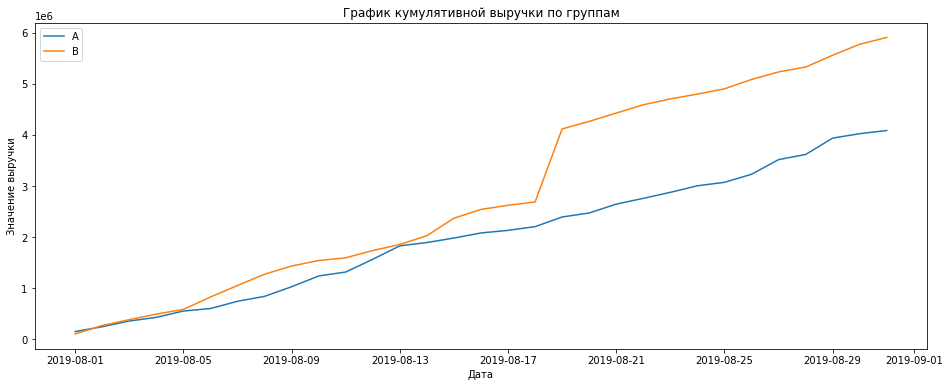

In [6]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
  
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))


import matplotlib.pyplot as plt
import numpy as np

datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                                     .agg({'date':'max', 'group':'max', 'transactionId':'nunique',
                                           'visitorId':'nunique', 'revenue':'sum'}), axis=1).sort_values(by=['date', 'group'])
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                                      .agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on = ['date', 'group'], right_on = ['date', 'group'])
cumulativeData.columns = ['date', 'group', 'transactions', 'buyers', 'revenue', 'visitors']

cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'transactions', 'buyers']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'transactions', 'buyers']]

plt.figure(figsize=(16,6))
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Значение выручки')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend();

<span style='color:blue'> Показатели кумулятивной выручки для обоих групп плавно растут. После примерно второй недели теста выручка группы В превзашла значения выручки группы А и продолжала увеличиваться. На 18 день наблюдается резкий скачок выручки в группе В, возможно имеет место быть аномалия.</span>

<span style='color:blue'> Часть 2.2
Строю график кумулятивного среднего чека по группам. Выводы и предположения.</span>

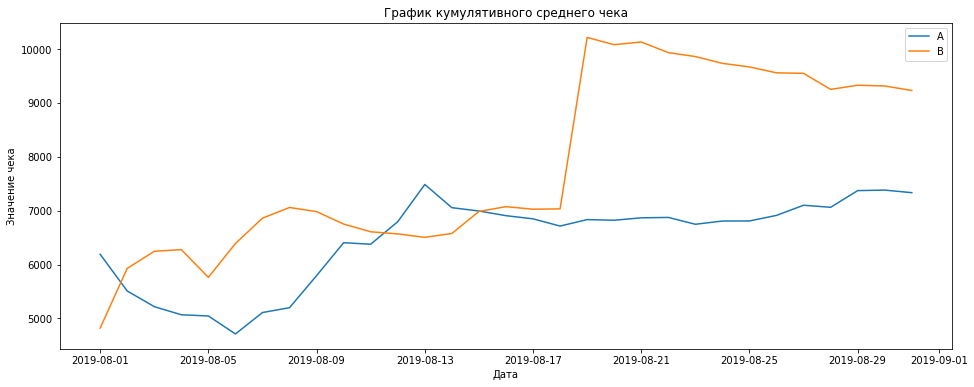

In [7]:
plt.figure(figsize=(16,6))
plt.title('График кумулятивного среднего чека')
plt.xlabel('Дата')
plt.ylabel('Значение чека')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['transactions'], label = 'A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['transactions'], label = 'B')
plt.legend();

<span style='color:blue'> График кумулятивного среднего чека довольно волатильный. Для группы А в первую неделю средний чек падал, однако во вторую неделю возрастал и к концу теста закрепился на уровне 7000. Кривая группы В показывает волнообразное движение, также подтвердилась гипотеза аномальных данных на 18 день, и к концу теста можно наблюдать небольшое снижение среднего чека к уровню 9000-9500.</span>

<span style='color:blue'> Часть 2.3 
Строю график относительного изменения кумулятивного среднего чека группы B к группе A.Ввыводы и предположения.</span>

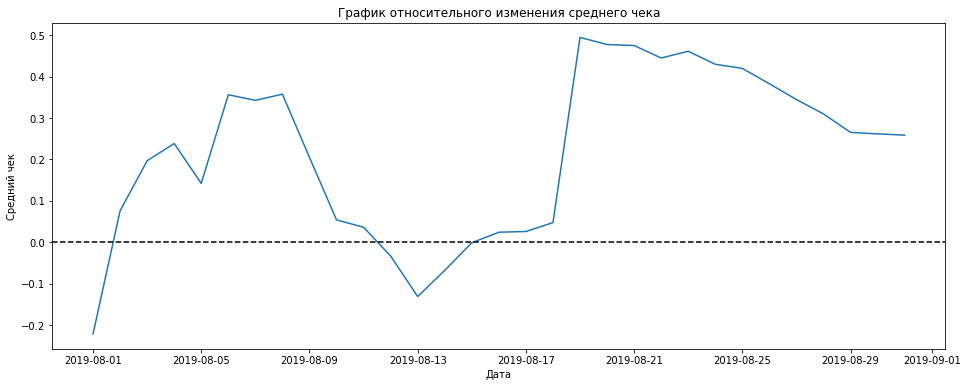

In [8]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date',
                                                   right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(16,6))
plt.title('График относительного изменения среднего чека')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['transactionsB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['transactionsA']) - 1)
plt.axhline(y=0, color='black', linestyle='--');

<span style='color:blue'> График различия между сегментами сильно скачет. Мозможно в данных есть выбросы.</span>

<span style='color:blue'> Часть 2.4 
Строю график кумулятивного среднего количества заказов по группам. Выводы и предположения.</span>

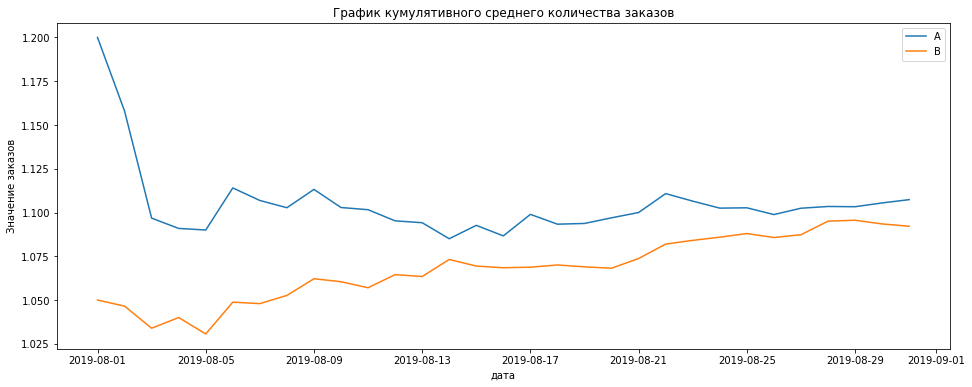

In [9]:
plt.figure(figsize=(16,6))
plt.title('График кумулятивного среднего количества заказов')
plt.xlabel('дата')
plt.ylabel('Значение заказов')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['transactions'] / cumulativeRevenueA['buyers'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['transactions'] / cumulativeRevenueB['buyers'], label='B')
plt.legend();

<span style='color:blue'> В отношении среднего количества заказов группа А превышает значения группы В. Однако, у группы В можно наблюдать незначительный рост показателя, тогда как значения группы А остаются примерно на одном уровне (от 1.10 до 1.15)</span>

<span style='color:blue'>Часть 2.5
Строю график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Выводы и предположения.</span>

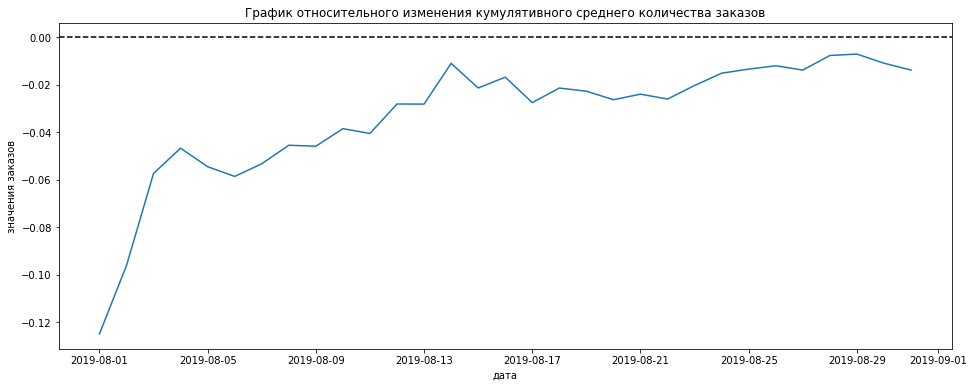

In [10]:
plt.figure(figsize=(16,6))
plt.title('График относительного изменения кумулятивного среднего количества заказов')
plt.xlabel('дата')
plt.ylabel('значения заказов')
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['transactionsB']/mergedCumulativeRevenue['buyersB'])
         /(mergedCumulativeRevenue['transactionsA']/mergedCumulativeRevenue['buyersA']) - 1)
plt.axhline(y=0, color='black', linestyle='--');

<span style='color:blue'> График различия между сегментами показывает постепенное увеличение количества заказов в группе В,однако всё ещё видно отставание от группы А на 0.02 пп.</span>

<span style='color:blue'>Часть 2.6
Построение точечного графика количества заказов по пользователям. Выводы и предположения.</span>

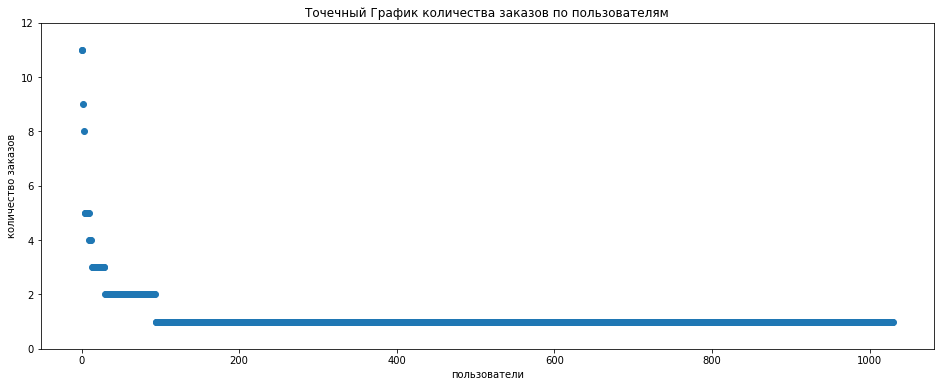

In [11]:
orders_cnt = orders.groupby('visitorId', as_index=False).agg({'transactionId':'nunique'}).sort_values('transactionId', ascending=False)
orders_cnt.columns = ['user', 'orders']
x_values = pd.Series(range(0, len(orders_cnt)))
plt.figure(figsize=(16,6))
plt.title('Точечный График количества заказов по пользователям')
plt.xlabel('пользователи')
plt.ylabel('количество заказов')
plt.scatter(x_values, orders_cnt['orders'])
ax = plt.gca()
ax.set_ylim([0,12]);

<span style='color:blue'> Из получившейся точечной диаграммы можно сделать вывод, что большинство пользователей делают 1-2 заказа.</span>

<span style='color:blue'> Часть 2.7 Расчитываю 95-й и 99-й перцентили количества заказов на пользователя. Определяю границу для определения аномальных пользователей.</span>

In [12]:
print(np.percentile(orders_cnt['orders'], [95, 99]))

[2. 4.]


<span style='color:blue'> Не больше 5% пользователей оформляли больше 2 заказов. Считаю границу для аномальных пользователей в 2 заказа включительно.</span>

<span style='color:blue'> Часть 2.8 Построение точечного графика стоимостей заказов. Выводы и предположения.</span>

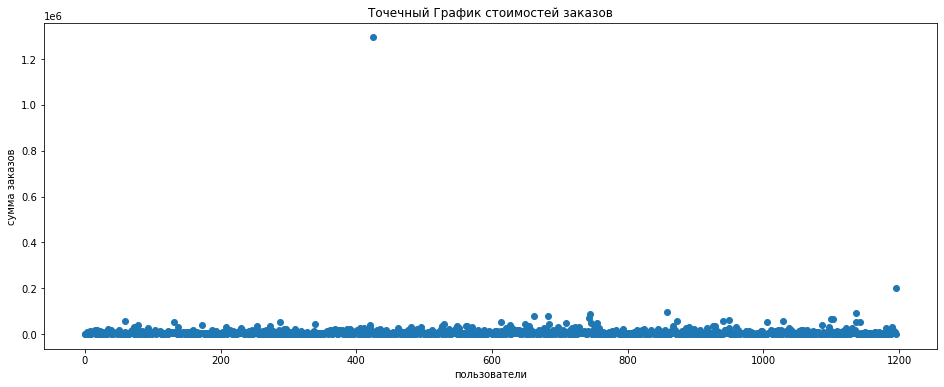

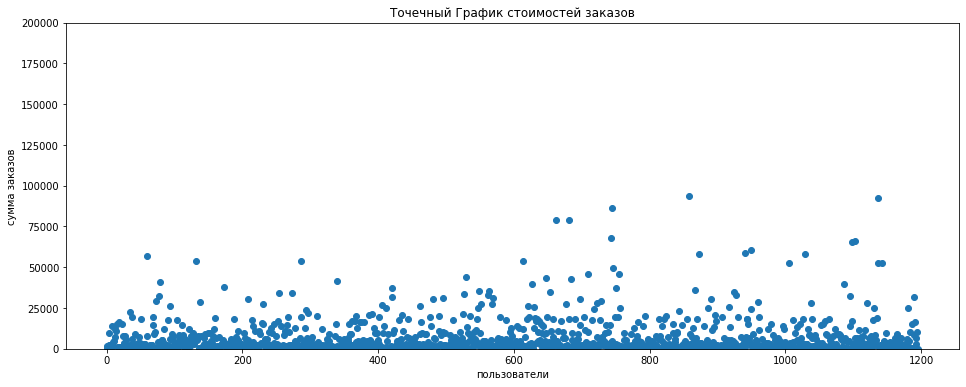

In [13]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(16,6))
plt.title('Точечный График стоимостей заказов')
plt.xlabel('пользователи')
plt.ylabel('сумма заказов')
plt.scatter(x_values, orders['revenue']);
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(16,6))
plt.title('Точечный График стоимостей заказов')
plt.xlabel('пользователи')
plt.ylabel('сумма заказов')
plt.scatter(x_values, orders['revenue'])
ax = plt.gca()
ax.set_ylim([0,200000]);

<span style='color:blue'> Из точечной диаграммы стоимости заказов видно, что в основном стоимость заказов находится в диапазоне до 50 000, наблюдаются отдельные выбросы на 100 000, 200 000 и даже 1 500 000.</span>

<span style='color:blue'>Часть 2.9 Расчет 95-й и 99-й перцентилей стоимости заказов. Определение границы для определения аномальных заказов.</span>

In [14]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


<span style='color:blue'> Деля на персентиль стоимость заказов можно сделать вывод, что не больше 5% пользователей оформляли заказ дороже 28 000.</span>

<span style='color:blue'>Формирую датасет для дальнейших расчетов</span>

In [15]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACumulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
                                           .agg({'date':'max', 'visitorsPerDateA':'sum'}), axis=1)
visitorsACumulative.columns = ['date', 'visitorsCumulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCumulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
                                           .agg({'date':'max', 'visitorsPerDateB':'sum'}), axis=1)
visitorsBCumulative.columns = ['date', 'visitorsCumulativeB']

ordersADaily = orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']].groupby('date', as_index=False).agg({'transactionId':'nunique', 'revenue':'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACumulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']]
                                       .agg({'date':'max', 'ordersPerDateA':'sum', 'revenuePerDateA':'sum'}), axis=1).sort_values(by=['date'])
ordersACumulative.columns = ['date', 'ordersCumulativeA', 'revenueCumulativeA']

ordersBDaily = orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']].groupby('date', as_index=False).agg({'transactionId':'nunique', 'revenue':'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCumulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]
                                       .agg({'date':'max', 'ordersPerDateB':'sum', 'revenuePerDateB':'sum'}), axis=1).sort_values(by=['date'])
ordersBCumulative.columns = ['date', 'ordersCumulativeB', 'revenueCumulativeB']

data = (
     ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')
    .merge(ordersACumulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCumulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACumulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCumulative, left_on='date', right_on='date', how='left'))

<span style='color:blue'>Часть 2.10 Считаю статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Проверка по критерию Манна-Уитни. Нулевая гипотеза: Статистически значимых различий в количестве заказов между группами по сырым данным нет. Альтернативная - Статистически значимые различия в количестве заказов между группами по сырым данным есть. Выбранный уровень alpha - 0,05.
</span>

In [16]:
import scipy.stats as stats

alpha = 0.05

ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersB.columns = ['user_id', 'orders']

#делаю выборки где каждый элемент будет соответствовать количеству заказов пользователя
# + во второй части метода concat добавляю нули, для пользователей, которые не совершали заказов
# - это разница между количеством поситителей и количеством записей о заказах 

sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - 
                                                                           len(ordersByUsersA['orders'])), name='orders')], axis=0)
sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - 
                                                                           len(ordersByUsersB['orders'])), name='orders')], axis=0)

result = stats.mannwhitneyu(sampleA, sampleB, True, 'less')
print('p-значение', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')
print('Величина относительного различия группы В над группой А - ', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-значение 0.008396177528376304
Отвергаем нулевую гипотезу: разница статистически значима
Величина относительного различия группы В над группой А -  0.138


<span style='color:blue'>По сырым данным можно сказать, что различие между средним количеством заказов есть. Показатель p-value меньше 0.05, значит нулевую гипотезу отвергаем. Относительное различие на 13,8% группы В над группой А.</span>

<span style='color:blue'>Часть 2.11 Оцениваю статистическую значимость различий в среднем чеке между группами по «сырым» данным. Проверка по критерию Манна-Уитни. Нулевая гипотеза: Статистически значимых различий в среднем чеке между группами по сырым данным нет. Альтернативная - Статистически значимые различия в среднем чеке между группами по сырым данным есть. Выбранный уровень alpha - 0,05.</span>

In [17]:
result = stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'], True, 'less')

print('p-значение', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')
print('Величина относительного различия группы В над группой А - ', "{0:.3f}".format(orders[orders['group'] == 'B']['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean() - 1))

p-значение 0.3646454927716229
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Величина относительного различия группы В над группой А -  0.259


<span style='color:blue'>По сырым данным можно сказать, что различий в среднем чеке нет. Показатель p-value гораздо больше 0.05.Различие группы В в 25,9% над группой А больше чем различие среднего количества заказов.</span>

<span style='color:blue'>Часть 2.12 Считаю статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Проверка по критерию Манна-Уитни. Нулевая гипотеза: Статистически значимых различий в количестве заказов между группами по очищенным данным нет. Альтернативная - Статистически значимые различия в количестве заказов между группами по очищенным данным есть. Выбранный уровень alpha - 0,05.Как аномалию считаю больше 2 заказов, как определил выше.</span>

In [18]:
usersWithManyOrders = pd.concat([
    ordersByUsersA[ordersByUsersA['orders'] > 2]['user_id'],
    ordersByUsersB[ordersByUsersB['orders'] > 2]['user_id']
], axis=0)

usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorId']

abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values())
print('Количество аномальных наблюдений -', abnormalUsers.shape[0])

sampleAFiltered = pd.concat([
    ordersByUsersA[np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))]['orders'], pd.Series(0, index=np.arange(
    data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleBFiltered = pd.concat([
    ordersByUsersB[np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))]['orders'], pd.Series(0, index=np.arange(
    data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

result = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, True, 'less')

print('p-значение', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')
print('Величина относительного различия группы В над группой А - ', "{0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

Количество аномальных наблюдений - 74
p-значение 0.006521296371518373
Отвергаем нулевую гипотезу: разница статистически значима
Величина относительного различия группы В над группой А -  0.173


<span style='color:blue'>По очищенным данным можно сказать, что различие между средним количеством заказов есть. Показатель p-value меньше 0.05, значит нулевую гипотезу отвергаем. Увеличилось относительное различие группы В - 17,2% над группой А.</span>

<span style='color:blue'>Часть 2.13 Считаю статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Проверка по критерию Манна-Уитни. Нулевая гипотеза: Статистически значимых различий в среднем чеке между группами по очищенным данным нет. Альтернативная - Статистически значимые различия в среднем чеке между группами по очищенным данным есть. Выбранный уровень alpha - 0,05.</span>

In [19]:
result = stats.mannwhitneyu(
    orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], True, 'less')

print('p-значение', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

print('Величина относительного различия группы В над группой А -', "{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B',
                                                                np.logical_not(orders['visitorId']
                                                                               .isin(abnormalUsers)))]['revenue'].mean() / 
                      orders[np.logical_and(orders['group'] == 'A',
                                                                np.logical_not(orders['visitorId']
                                                                               .isin(abnormalUsers)))]['revenue'].mean() - 1))

p-значение 0.630838101246686
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Величина относительного различия группы В над группой А - -0.020


<span style='color:blue'>По очищенным данным можно сказать, что различие между средним чеком отсутствует. Показатель p-value больше 0.05. Уменьшилось относительное различие группы В - (2,3%) над группой А.</span>

In [20]:
print(visitors['visitors'].mean())

607.2903225806451


<div class="alert alert-info">
<b> Комментарий студента</b>

Общий вывод по результатам теста
 - есть различие в среднем количестве заказов пользователей как по сырым так и по очищенным данным
 - однако статистически значимого различия среднего чека в группах нет, как по сырым так и по очищенным данным
 - считаю, что тест можно завершить. Различий в среднем чеке нет, но так как количество заказов в группе В больше чем в группе А, то итоговая выручка увеличится с применением тестируемых изменений</div>